In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/Unemployment in India.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [20]:
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,mean_absolute_error,r2_score,mean_squared_error,silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
dfun= pd.read_csv('/content/Unemployment in India.csv')
dfun

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dfun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [25]:
dfun.shape

(768, 7)

In [26]:
for i in dfun.columns:
    print('-------------------------')
    print(dfun[i].value_counts())

-------------------------
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64
-------------------------
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [27]:
dfun[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [28]:
dfun['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [29]:
last_records = dfun.tail(15)
last_records

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_droped_lastrecords_null_values  = dfun.drop(dfun.tail(14).index)

# Now data_without_last_30 contains the dataset without the last 30 records
df_droped_lastrecords_null_values

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [31]:
# To see rows with null values
rows_with_null= df_droped_lastrecords_null_values[df_droped_lastrecords_null_values.isnull().any(axis=1)]

# Now 'rows_with_null' contains the rows with at least one null value
rows_with_null

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_cl = df_droped_lastrecords_null_values.dropna()
df_cl

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [33]:
df_cl.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [34]:
for i in df_cl.columns:
    print(df_cl[i].value_counts())

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64
Monthly     381
 Monthly    359
Name:  Frequency, d

In [35]:
columns_mapping = {
    'Region': 'Region',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Estimated_Unemployment_Rate_(%)',
    ' Estimated Employed': 'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)': 'Estimated_Labour_Participation_Rate_(%)',
    ' Area': 'Area'
}

# Rename columns using the dictionary
df_cl.rename(columns=columns_mapping, inplace=True)

# Now the columns are renamed according to the mapping in the 'columns_mapping' dictionary
df_cl.columns


Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [36]:
data_types = {
    'Region': str,
    'Date': 'datetime64',
    'Frequency': str,
    'Estimated_Unemployment_Rate_(%)': float,
    'Estimated_Employed': float,
    'Estimated_Labour_Participation_Rate_(%)': float,
    'Area': str
}
# Convert columns to the correct data types
df_cl = df_cl.astype(data_types)

df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated_Unemployment_Rate_(%)          740 non-null    float64       
 4   Estimated_Employed                       740 non-null    float64       
 5   Estimated_Labour_Participation_Rate_(%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


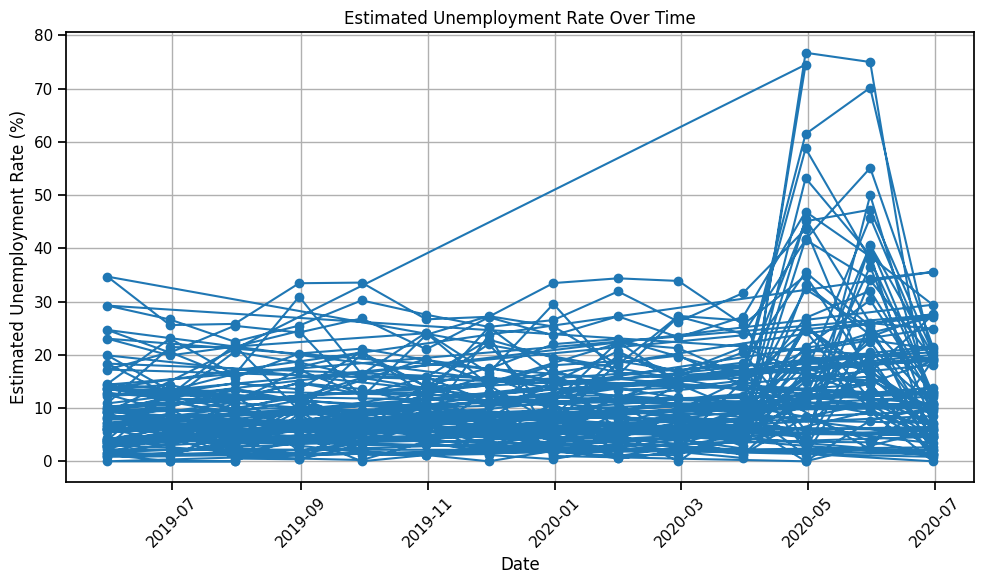

In [52]:
# Plot Estimated Unemployment Rate over time
plt.figure(figsize=(10, 6))
plt.plot(df_cl['Date'], df_cl['Estimated_Unemployment_Rate_(%)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

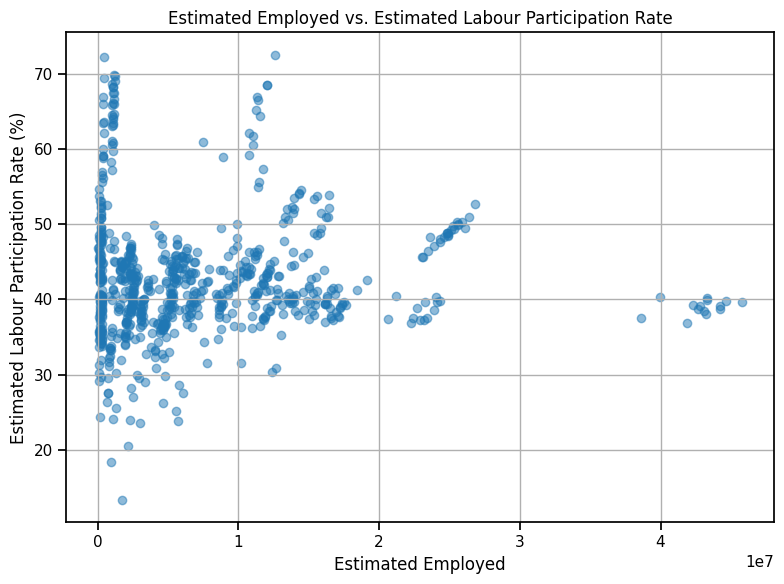

In [51]:
# Plot Estimated Employed vs. Estimated Labour Participation Rate
plt.figure(figsize=(8, 6))
plt.scatter(df_cl['Estimated_Employed'], df_cl['Estimated_Labour_Participation_Rate_(%)'], alpha=0.5)
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Estimated Employed vs. Estimated Labour Participation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

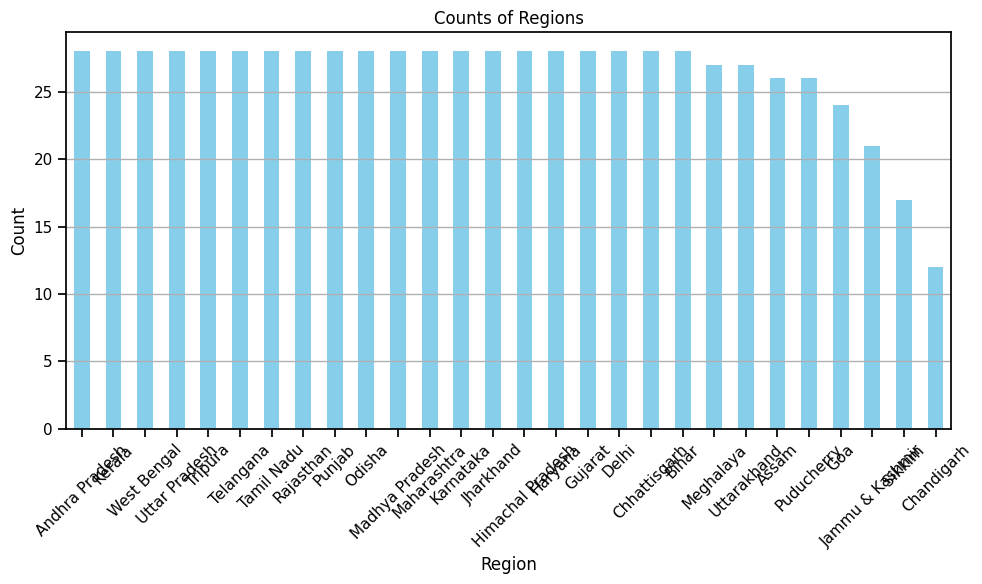

In [50]:
# Create a bar plot of the 'Region' column
plt.figure(figsize=(10, 6))
region_counts = df_cl['Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Counts of Regions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


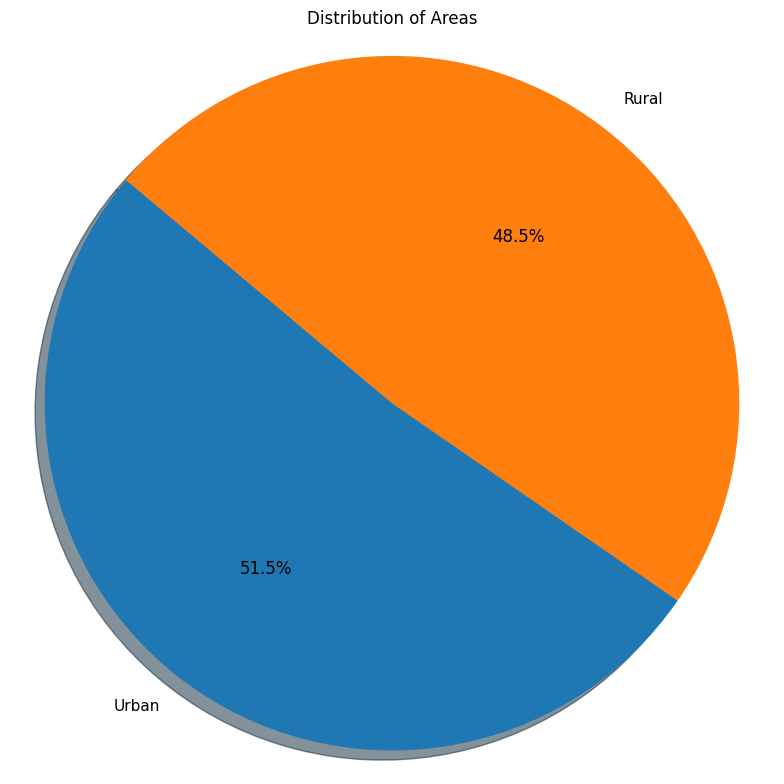

In [49]:
# Create a pie chart of the 'Area' column
plt.figure(figsize=(8, 8))
area_counts = df_cl['Area'].value_counts()
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Areas')
plt.tight_layout()
plt.show()

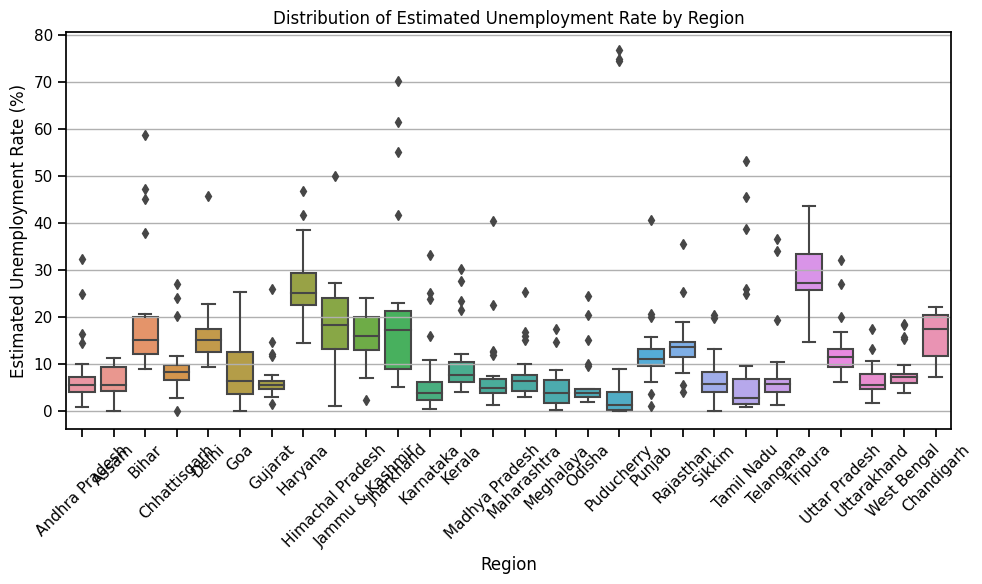

In [48]:
# Box plot to visualize the distribution of Estimated Unemployment Rate across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df_cl)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

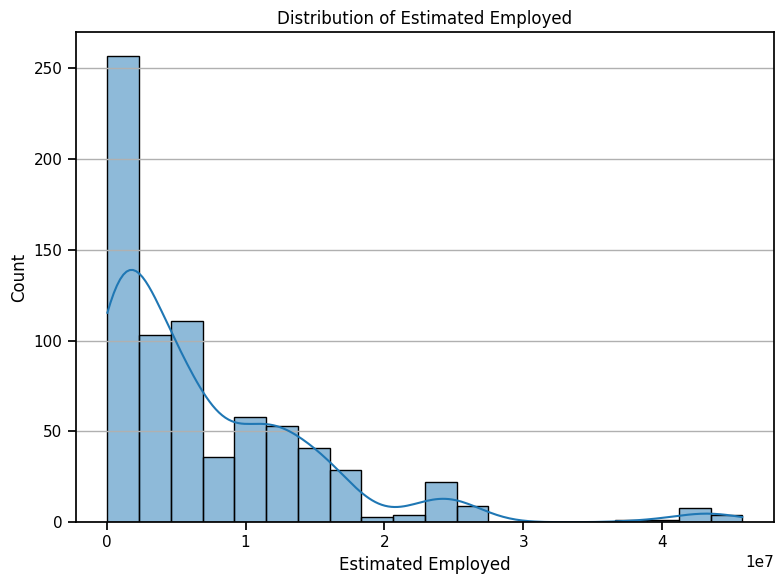

In [47]:
# Histogram to see the distribution of Estimated Employed
plt.figure(figsize=(8, 6))
sns.histplot(df_cl['Estimated_Employed'], bins=20, kde=True)
plt.xlabel('Estimated Employed')
plt.ylabel('Count')
plt.title('Distribution of Estimated Employed')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

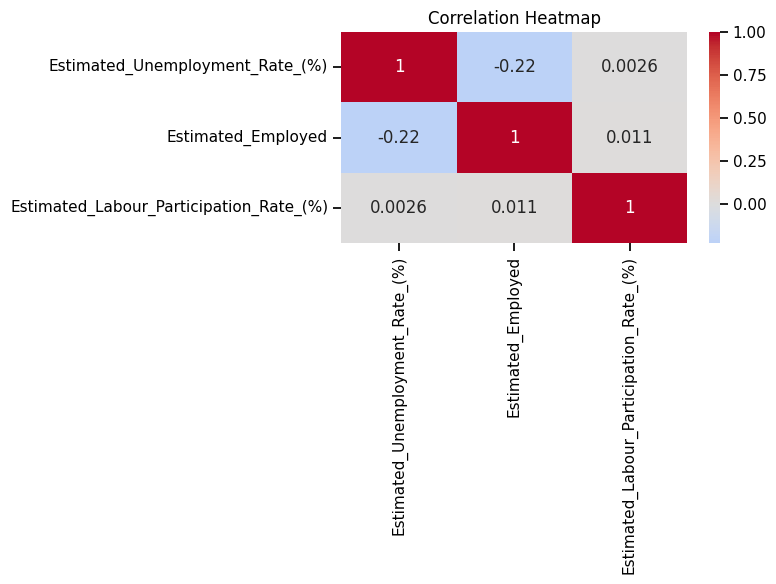

In [46]:
# Heatmap to visualize the correlation between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_cl.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

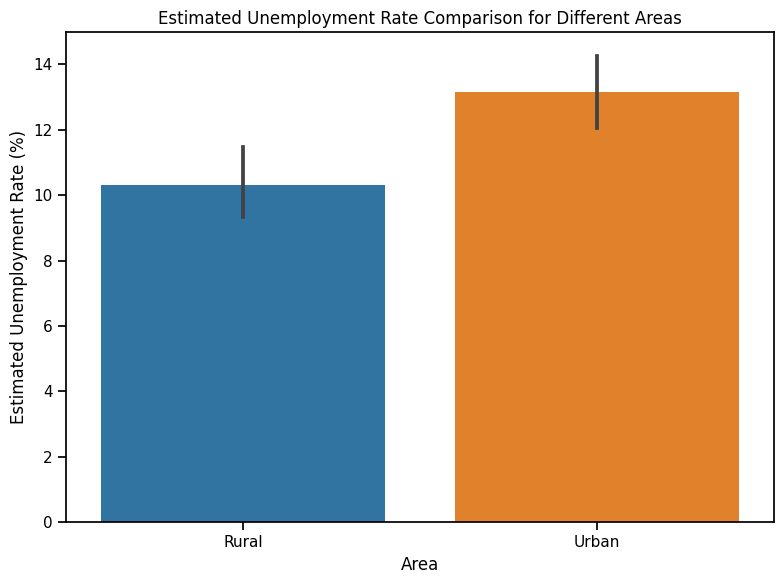

In [45]:
# Bar plot to compare Estimated Unemployment Rate for different Areas
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Estimated_Unemployment_Rate_(%)', data=df_cl)
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate Comparison for Different Areas')
plt.tight_layout()
plt.show()

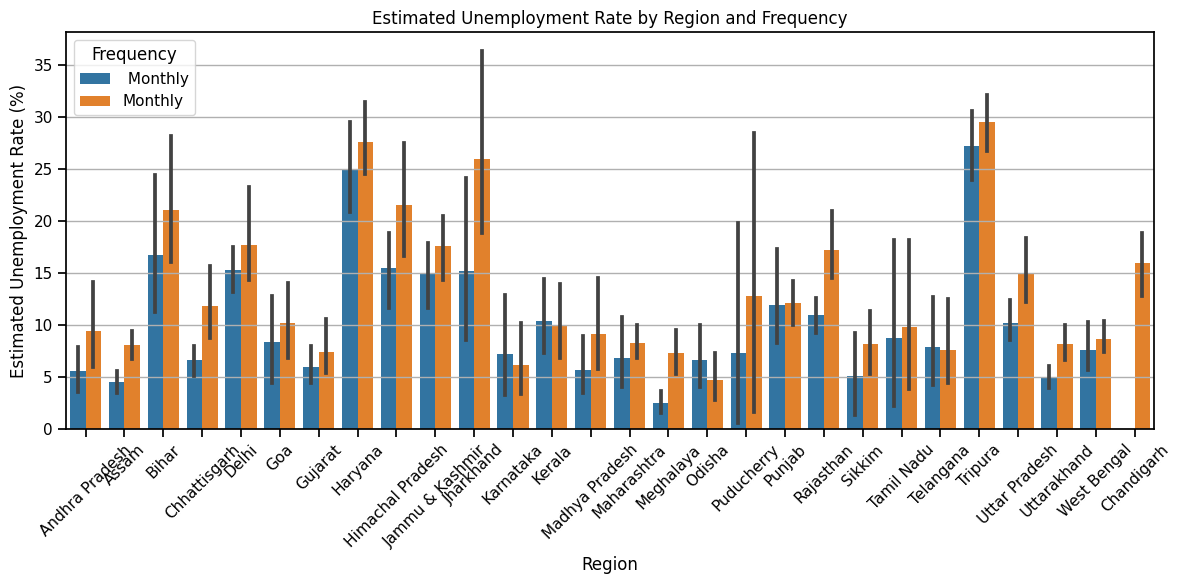

In [53]:
# Plotting Estimated Unemployment Rate (%) by Region and Frequency
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', hue='Frequency', data=df_cl)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by Region and Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Frequency', title_fontsize='12')
plt.tight_layout()
plt.show()

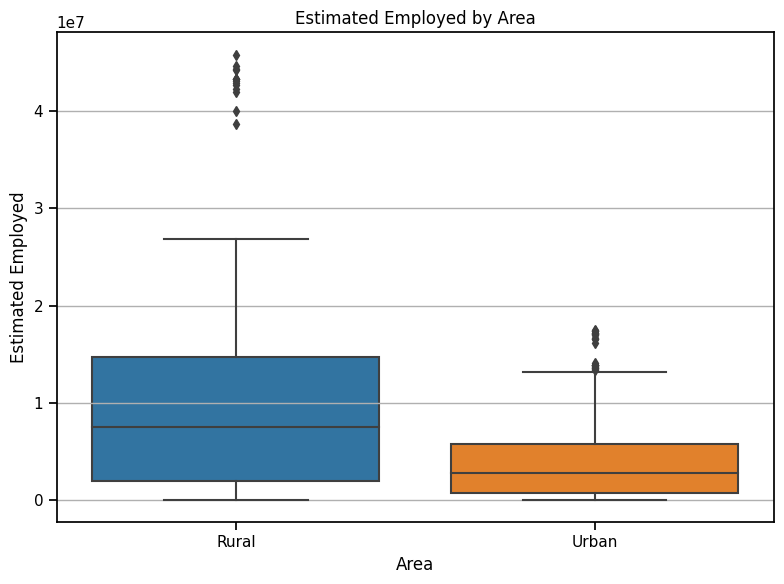

In [54]:
# Plotting Estimated Employed by Area
plt.figure(figsize=(8, 6))
sns.boxplot(x='Area', y='Estimated_Employed', data=df_cl)
plt.xlabel('Area')
plt.ylabel('Estimated Employed')
plt.title('Estimated Employed by Area')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

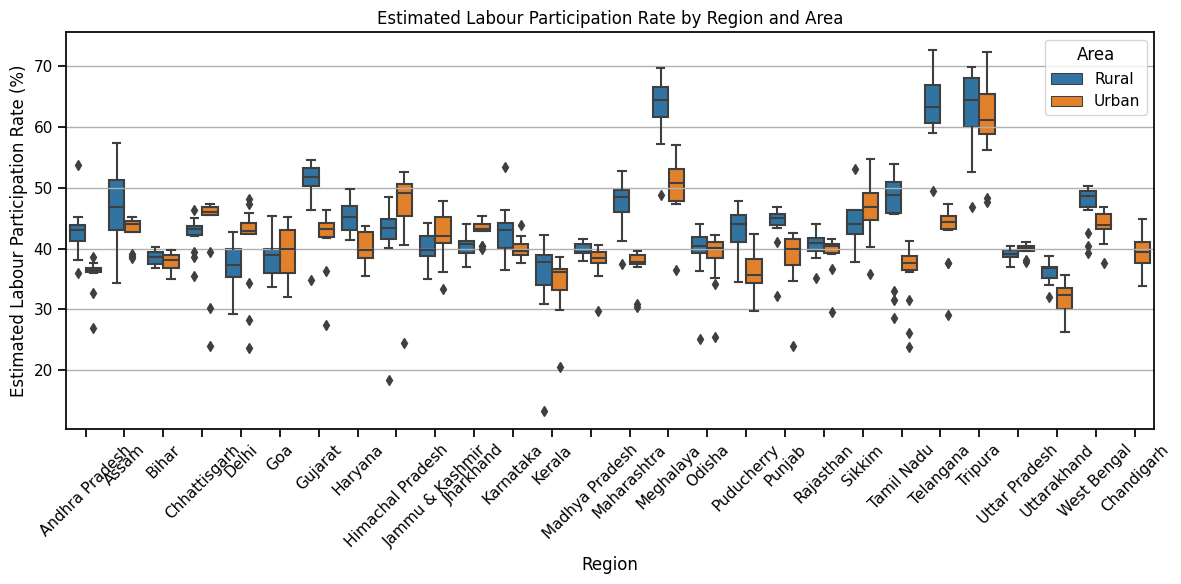

In [55]:
# Plotting Estimated Labour Participation Rate (%) by Region and Area
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated_Labour_Participation_Rate_(%)', hue='Area', data=df_cl)
plt.xlabel('Region')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate by Region and Area')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Area', title_fontsize='12')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

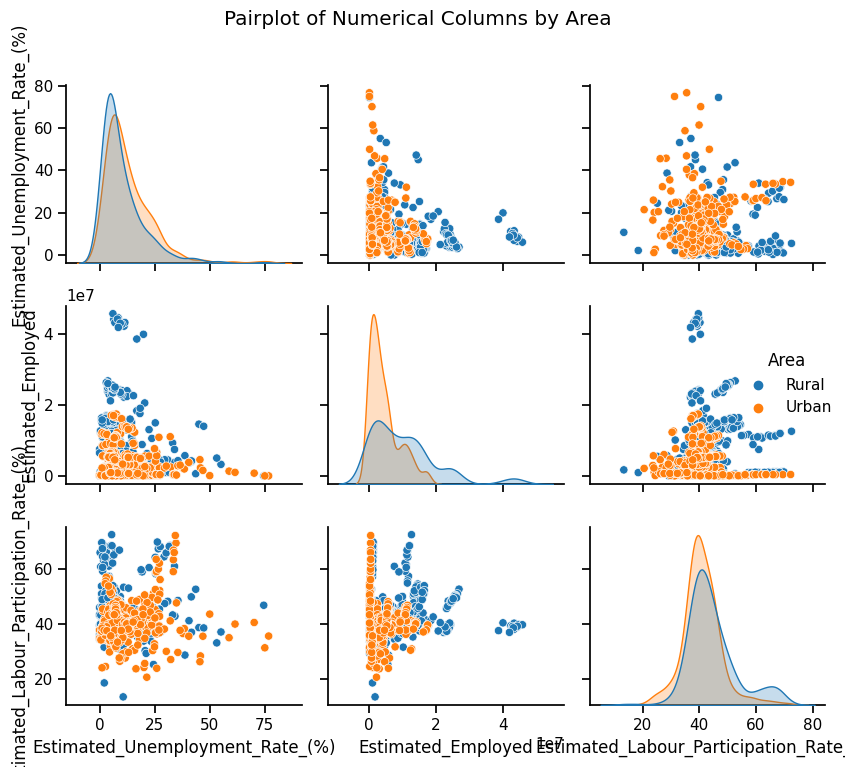

In [56]:
# Pairplot to visualize relationships between numerical columns by Area
plt.figure(figsize=(10, 8))
sns.pairplot(data=df_cl, vars=['Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)'], hue='Area')
plt.suptitle('Pairplot of Numerical Columns by Area', y=1.02)
plt.tight_layout()
plt.show()

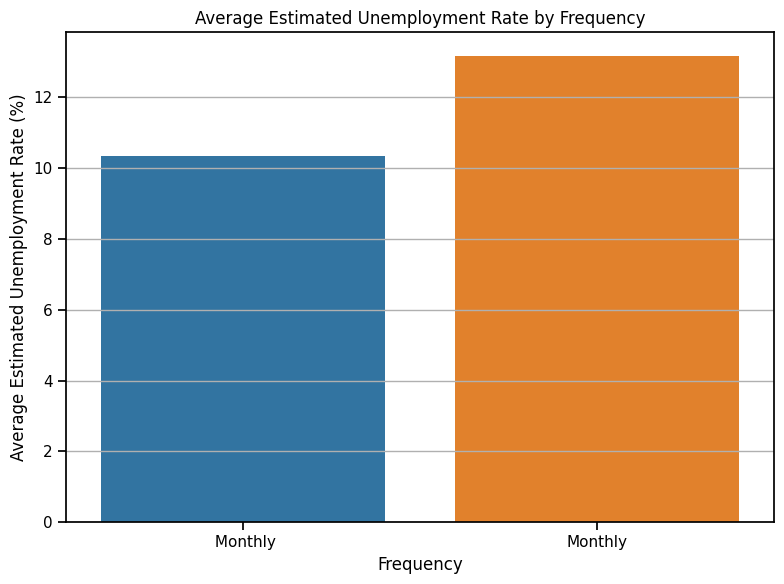

In [57]:
# Bar plot to show the average Estimated Unemployment Rate by Frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Estimated_Unemployment_Rate_(%)', data=df_cl, ci=None)
plt.xlabel('Frequency')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.title('Average Estimated Unemployment Rate by Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [58]:
# Calculate descriptive statistics for 'Estimated_Unemployment_Rate_(%)'
unemployment_rate = df_cl['Estimated_Unemployment_Rate_(%)']
unemployment_rate

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name: Estimated_Unemployment_Rate_(%), Length: 740, dtype: float64

In [59]:
# Descriptive statistics
mean_unemployment_rate = unemployment_rate.mean()
median_unemployment_rate = unemployment_rate.median()
std_unemployment_rate = unemployment_rate.std()
min_unemployment_rate = unemployment_rate.min()
max_unemployment_rate = unemployment_rate.max()

print("Descriptive Statistics for Estimated Unemployment Rate (%):")
print(f"Mean: {mean_unemployment_rate:.2f}")
print(f"Median: {median_unemployment_rate:.2f}")
print(f"Standard Deviation: {std_unemployment_rate:.2f}")
print(f"Minimum: {min_unemployment_rate:.2f}")
print(f"Maximum: {max_unemployment_rate:.2f}")

Descriptive Statistics for Estimated Unemployment Rate (%):
Mean: 11.79
Median: 8.35
Standard Deviation: 10.72
Minimum: 0.00
Maximum: 76.74


In [60]:
# Conduct one-sample t-test to check if the unemployment rate is significantly different from 0
t_stat, p_value = stats.ttest_1samp(unemployment_rate, 0)
print("\nOne-sample t-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


One-sample t-test results:
T-statistic: 29.91
P-value: 0.0000


In [61]:
# Perform linear regression to model the relationship between unemployment rate and labor participation rate
X = df_cl['Estimated_Labour_Participation_Rate_(%)']
X = sm.add_constant(X)  # Adding a constant term for the intercept
y = df_cl['Estimated_Unemployment_Rate_(%)']

model = sm.OLS(y, X).fit()
print("\nLinear Regression Results:")
print(model.summary())


Linear Regression Results:
                                   OLS Regression Results                                  
Dep. Variable:     Estimated_Unemployment_Rate_(%)   R-squared:                       0.000
Model:                                         OLS   Adj. R-squared:                 -0.001
Method:                              Least Squares   F-statistic:                  0.004829
Date:                             Tue, 01 Aug 2023   Prob (F-statistic):              0.945
Time:                                     02:54:14   Log-Likelihood:                -2805.0
No. Observations:                              740   AIC:                             5614.
Df Residuals:                                  738   BIC:                             5623.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                              coef  

In [62]:
# Hypothesized value for the population mean unemployment rate
hypothesized_mean = 5.0

# Extract the 'Estimated_Unemployment_Rate_(%)' column
unemployment_rate = df_cl['Estimated_Unemployment_Rate_(%)']

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(unemployment_rate, hypothesized_mean)

# Print the results
print("One-sample t-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Check if the result is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. The average estimated unemployment rate is significantly different from 5%.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate from 5%.")

One-sample t-test results:
T-statistic: 17.22
P-value: 0.0000
The null hypothesis is rejected. The average estimated unemployment rate is significantly different from 5%.


In [63]:
# Extract the 'Estimated_Unemployment_Rate_(%)' column for each region
unemployment_rate_andhra = df_cl[df_cl['Region'] == 'Andhra Pradesh']['Estimated_Unemployment_Rate_(%)']
unemployment_rate_westbengal = df_cl[df_cl['Region'] == 'West Bengal']['Estimated_Unemployment_Rate_(%)']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(unemployment_rate_andhra, unemployment_rate_westbengal)

# Print the results
print("Independent Samples t-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Check if the result is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference in the average estimated unemployment rate between 'Andhra Pradesh' and 'West Bengal'.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate between 'Andhra Pradesh' and 'West Bengal'.")

Independent Samples t-test results:
T-statistic: -0.44
P-value: 0.6649
The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate between 'Andhra Pradesh' and 'West Bengal'.


In [64]:
# Group 'Estimated_Unemployment_Rate_(%)' by 'Region'
grouped_data = df_cl.groupby('Region')['Estimated_Unemployment_Rate_(%)']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*[group.values for name, group in grouped_data])

# Print the results
print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Check if the result is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference in the average estimated unemployment rate among different regions.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate among different regions.")

One-way ANOVA results:
F-statistic: 13.35
P-value: 0.0000
The null hypothesis is rejected. There is a significant difference in the average estimated unemployment rate among different regions.


In [65]:
df_2 = pd.read_csv('/content/Unemployment in India.csv')
df_2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [67]:
for i in df_2.columns:
    print('-------------------------------')
    print(df_2[i].value_counts())

-------------------------------
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64
-------------------------------
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, 

In [68]:
df_2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [69]:
df_2.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [70]:
# Replace the columns without space by removing spaces
df_2.rename(columns={
    'Region': 'Region',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Estimated_Unemployment_Rate',
    ' Estimated Employed': 'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)': 'Estimated_Labour_Participation_Rate'
}, inplace=True)

# Check the updated column names
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated_Unemployment_Rate          740 non-null    float64
 4   Estimated_Employed                   740 non-null    float64
 5   Estimated_Labour_Participation_Rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [71]:
# Explore unique values in categorical columns
unique_values_region = df_2['Region'].unique()
unique_values_frequency = df_2['Frequency'].unique()
print("\nUnique Values - Region:")
print(unique_values_region)
print("\nUnique Values - Frequency:")
print(unique_values_frequency)


Unique Values - Region:
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']

Unique Values - Frequency:
[' Monthly' nan 'Monthly']


In [72]:
data_types = {
    'Region': str,
    'Date': 'datetime64',
    'Frequency': str,
    'Estimated_Unemployment_Rate': float,
    'Estimated_Employed': float,
    'Estimated_Labour_Participation_Rate': float
}
# Convert columns to the correct data types
df_2 = df_2.astype(data_types)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               768 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            768 non-null    object        
 3   Estimated_Unemployment_Rate          740 non-null    float64       
 4   Estimated_Employed                   740 non-null    float64       
 5   Estimated_Labour_Participation_Rate  740 non-null    float64       
 6   Area                                 740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [74]:
# Correlation matrix
correlation_matrix = df_2.corr()
print(correlation_matrix)

                                     Estimated_Unemployment_Rate  \
Estimated_Unemployment_Rate                             1.000000   
Estimated_Employed                                     -0.222876   
Estimated_Labour_Participation_Rate                     0.002558   

                                     Estimated_Employed  \
Estimated_Unemployment_Rate                   -0.222876   
Estimated_Employed                             1.000000   
Estimated_Labour_Participation_Rate            0.011300   

                                     Estimated_Labour_Participation_Rate  
Estimated_Unemployment_Rate                                     0.002558  
Estimated_Employed                                              0.011300  
Estimated_Labour_Participation_Rate                             1.000000  


In [75]:
# Average Estimated_Unemployment_Rate by Region
average_unemployment_rate_by_region = df_2.groupby('Region')['Estimated_Unemployment_Rate'].mean()
print(average_unemployment_rate_by_region)

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
nan                       NaN
Name: Estimated_Unemployment_Rate, dtype: float64


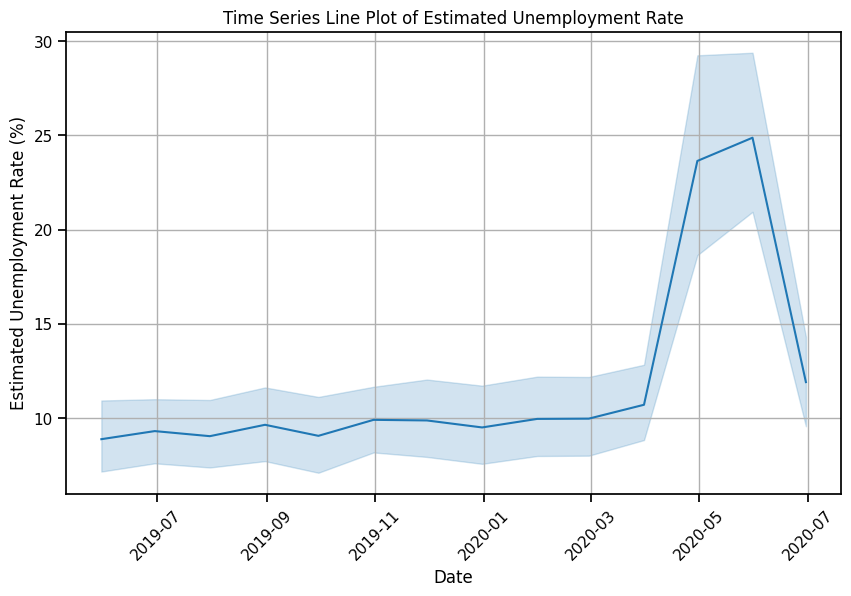

In [76]:
# Time series line plot of Estimated_Unemployment_Rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate', data=df_2)
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Time Series Line Plot of Estimated Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [77]:
# Basic Statistics
df_stats = df_2[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated_Unemployment_Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated_Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated_Labour_Participation_Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [81]:
# Statistics by Region
region_stats = df_2.groupby(['Region'])[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate
0,Andhra Pradesh,7.48,8154093.18,39.38
1,Assam,6.43,5354772.15,44.87
2,Bihar,18.92,12366189.14,38.15
3,Chandigarh,15.99,316831.25,39.34
4,Chhattisgarh,9.24,4303498.57,42.81
5,Delhi,16.50,2627512.86,38.93
6,Goa,9.27,226308.33,39.25
7,Gujarat,6.66,11402012.79,46.10
8,Haryana,26.28,3557072.46,42.74
9,Himachal Pradesh,18.54,1059823.71,44.22


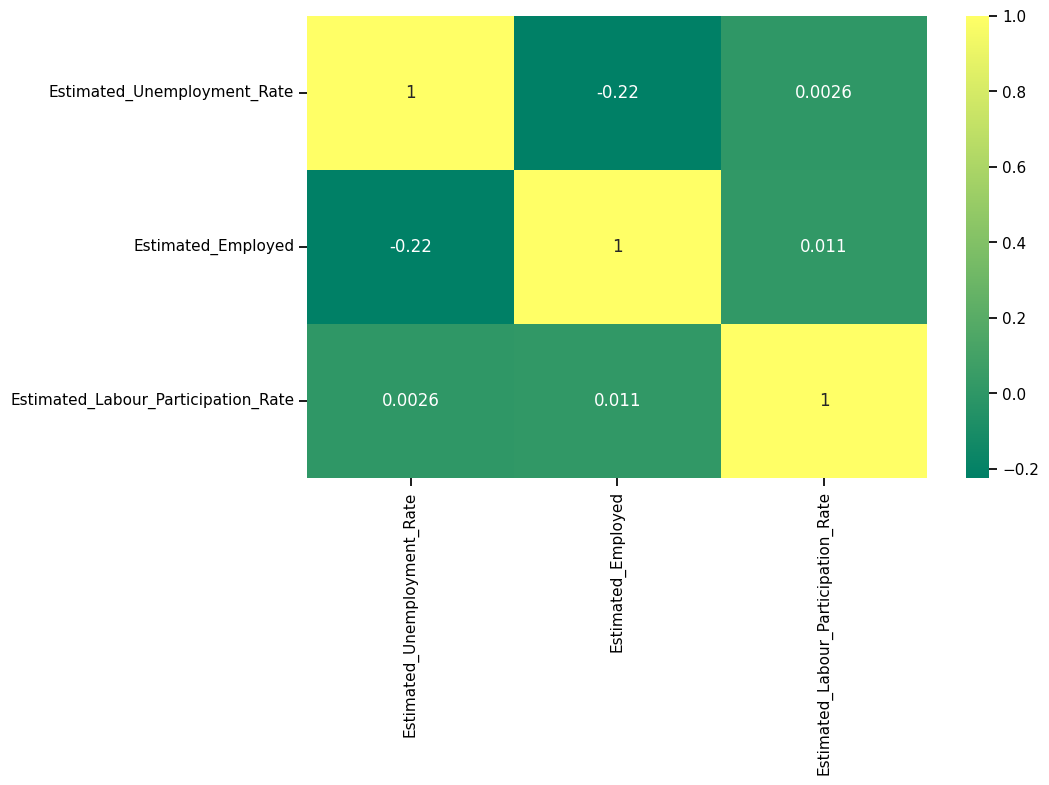

In [82]:
# Correlation Heatmap
heat_maps = df_2[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')
plt.show()

In [83]:
# Bar plot of average Unemployment Rate by Region
plot_ump = df_2[['Estimated_Unemployment_Rate', 'Region']]
df_unemp = plot_ump.groupby('Region').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated_Unemployment_Rate')
fig = px.bar(df_unemp, x='Region', y='Estimated_Unemployment_Rate', color='Region',
             title='Average Unemployment Rate in each region', template='plotly')
fig.show()

In [100]:
# Sunburst chart showing unemployment rate in each region and state
unemplo_df = df_2[['Region', 'Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
unemplo = unemplo_df.groupby(['Region'])['Estimated_Unemployment_Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region'], values='Estimated_Unemployment_Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region',
                  height=650, template='ggplot2')
fig.show()